# MILESTONE 2

`File name:` milestone2.py

`Authors:`
- Víctor González
- Alvaro Bautista 
- Alicia Soria 
- Kamil Czerniak

`Date created:` 05/11/2021

`Date last modified:` 12/11/2021

`Python Version:` 3.9.2


---

## Table of contents

**1. INTRODUCTION**
   * Context
   * Project idea
   * Project goals
   * Motivation
   * Feasibility
   
   
   
**2. THE DATA**
   * Quotebank
   * External data
    
    
    
**3. PIPELINE**
   * Load data
   * Examine our data
   * Clean up data
   * Modeling
   * Interpreting
   * Storytelling and communication
    
    
    
**4. CONCLUSIONS**
   * Summary
   * Results
   * Problems encountered
    
    
    
**5. FUTURE LINES**

---

# 1. Introduction

### 1.1. Context

# Brief introduction
Welcome Milestone 2 Python notebook.
In this notebook we will answer several research questions surrounding the Breixit event.
We will employ the Quotebank dataset mainly, as well as additional databases to enrich the data and obtain more
complete conclusions.

### 1.2. Project idea


# Explain in clear, reasonable, and thorough way the project idea
Pinpoint and determine the arguments for and against Breixit in different social groups

### 1.3. Project goals

# Clear project goals

### 1.4. Motivation


In [1]:
# What story do we want to tell, why?
# Critical awareness of the project (social, cultural, political, economic, education. ... impact)

### 1.5. Feasibility

In [2]:
# Justify feasibility given the data

---

# 2. The data

## 2.1. Quotebank

This data source is described best by its makers:

>Quotebank is a dataset of 178 million unique, speaker-attributed quotations that were extracted from 196 million English news articles crawled from over 377 thousand web domains between August 2008 and April 2020. The quotations were extracted and attributed using Quobert, a distantly and minimally supervised end-to-end, language-agnostic framework for quotation attribution.

(*Vaucher, Timoté, Spitz, Andreas, Catasta, Michele, & West, Robert. (2021). Quotebank: A Corpus of Quotations from a Decade of News (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4277311 (accessible on November 10, 2021)*)

In our case, we will use data collected between January 2015 and April 2020. We decided to put the start date in 2015, as this was the year of General Election in the United Kingdom, where the Conservative Party (which won the majority in the House of Commons) has put a promise of an in-out referendum in its manifesto:

>We will negotiate new rules with the EU, so that people will have to be earning here for a number of years before they can claim benefits, including the tax credits that top up low wages. Instead of something-fornothing, we will build a system based on the principle of something-for-something. We will then put these changes to the British people in a straight in-out referendum on our membership of the European Union by the end of 2017.

(*The Conservative Party Manifesto 2015, http://ucrel.lancs.ac.uk/wmatrix/ukmanifestos2015/localpdf/Conservatives.pdf (accessible on November 10, 2021)*)

The data source is based on this paper: Timoté Vaucher, Andreas Spitz, Michele Catasta, and Robert West

"Quotebank: A Corpus of Quotations from a Decade of News"

Proceedings of the 14th International ACM Conference on Web Search and Data Mining (WSDM), 2021.

*https://doi.org/10.1145/3437963.3441760*

## Description of the data

This data source is described best by its makers:

> Quotebank is a dataset of 178 million unique, speaker-attributed quotations that were extracted from 196 million English news articles crawled from over 377 thousand web domains between August 2008 and April 2020. The quotations were extracted and attributed using Quobert, a distantly and minimally supervised end-to-end, language-agnostic framework for quotation attribution.

(*Vaucher, Timoté, Spitz, Andreas, Catasta, Michele, & West, Robert. (2021). Quotebank: A Corpus of Quotations from a Decade of News (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4277311 (accessible on November 10, 2021)*)

In our case, we will use data collected between January 2015 and April 2020. We decided to put the start date in 2015, as this was the year of General Election in the United Kingdom, where the Conservative Party (which won the majority in the House of Commons) has put a promise of an in-out referendum in its manifesto:

> We will negotiate new rules with the EU, so that people will have to be earning here for a number of years before they can claim benefits, including the tax credits that top up low wages. Instead of something-fornothing, we will build a system based on the principle of something-for-something. We will then put these changes to the British people in a straight in-out referendum on our membership of the European Union by the end of 2017.

(*The Conservative Party Manifesto 2015, http://ucrel.lancs.ac.uk/wmatrix/ukmanifestos2015/localpdf/Conservatives.pdf (accessible on November 10, 2021)*)

The data source is based on this paper: *Timoté Vaucher, Andreas Spitz, Michele Catasta, and Robert West
"Quotebank: A Corpus of Quotations from a Decade of News"
Proceedings of the 14th International ACM Conference on Web Search and Data Mining (WSDM), 2021.
https://doi.org/10.1145/3437963.3441760*

### 2.2. External data

In order to get more context behind the speakers, we opted to use Wikidata dataset. This dataset, meant primarily for use in Wikimedia projects like Wikipedia or Wiktionary, contains properties and references describing an item, e.g., a person or a country. Because Quotebank uses Wikidata QIDs to refer to speakers, we can easily link persons to their attributes in Wikidata.

Wikidata entries can contain an infinite number of attributes and references, so we have decided to use only a small number of attributes, which we can then use for demographic analysis. These attributes are:
- gender
- date of birth
- nationality
- occupation
- political party
- academic degree
- what political offices a person candidated for
- religion

All of these attributes are capable of containing multiple values (e.g., the entry for Angela Merkel marks her nationality as German and East German).

This dataset, in its entirety, may have a size of about 100 GB, which is why we decided to use a subset provided by the course (named *speaker_attributes.parquet*). This subset contains these attributes (and a couple more that we opted not to use) for all speakers featured in Quotebank. In addition, we were provided with labels of all Wikidata entries used in the mentioned subset (*wikidata_labels_descriptions_quotebank.csv.bz2*), in order to dereference non-speaker attributes (like gender) more easily.

#### References
- Wikidata website: https://www.wikidata.org/wiki/Wikidata:Main_Page
- Google Drive directory with preprocessed Wikidata dataset: https://drive.google.com/drive/folders/1VAFHacZFh0oxSxilgNByb1nlNsqznUf0

---

# 3. Pipeline

# Pipeline we are going to follow
- Load data
- Examine our data
- Clean up data
- Exploring and visualizing
- Modeling
- Interpreting our data
- Storytelling and communication

In [5]:
#Import packages
import re, json, bz2
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
sw = stopwords.words('english')
print('Finished imports')

Finished imports


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/victorgonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
YEARS = ["2015", "2016", "2017", "2018", "2019", "2020"]

## 3.1. Load data

We encourage you to use Google Colab for executing this part of notebook - Google Colab has support for Google Drive, which in turn has support for linking to external folders, allowing us to use larger datasets without losing space capacity on our accounts. In addition, step 3 relies on loading speaker attributes to memory before handling them - this requires ~6 GB of RAM, which could be an issue on computers with 8 GB of RAM or less.

Each step will generate its own output files, for each year, to limit the strain on following steps and allow analysis of what was removed in each step by comparing pre-step data.

We start by importing libraries that will be used in the pipeline. We also define years to be considered - this will be used to load files for each year and save the output.

The first step removes quotes that are not mentioning Brexit and as such are irrelevant to our analysis. We do this by using a regular expression that matches quotes that either contain the phrase "Brexit" or the combination of "leave", "leaving", "exit", "exiting" and "EU" or "European Union". We use a streaming approach used [here](https://colab.research.google.com/drive/1NqLFrAWAzKxr2dAWHI7m6Ml3gWGF72cA) in order to reduce the strain on RAM usage (each datasource file is approx. 2 GB in size).

**Input:** Compressed JSON file with quotes from Quotebank from given year, e.g., `quotes-{year}.json.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit from Quotebank from given year, e.g., `quotes-{year}-step1.json.bz2``

**NOTE:** due to large number of quotes, this step can take long time - possibly over an hour. You have been warned.

Notes:
1. Each step will generate its own output files, for each year, to limit the strain on following steps and allow analysis of what was removed in each step by comparing pre-step data.

In [7]:
# # Step 1: only keep quotes that contain phrases: Brexit OR ((leaving OR leave OR exiting OR exit) AND (EU or European Union))

# regex_text = "(brexit)|((leave|leaving|exit|exiting).*(\W+eu\W+|\W+european union))"
# regex = re.compile(regex_text, re.IGNORECASE)

# for year in YEARS:
#     path_to_file = f'data/quotes-{year}.json.bz2' 
#     path_to_out = f'data/quotes-{year}-step1.json.bz2'

#     with bz2.open(path_to_file, 'rb') as s_file:
#         with bz2.open(path_to_out, 'wb') as d_file:
#             for instance in s_file:
#                 instance = json.loads(instance) # loading a sample
#                 quotation = instance['quotation'] + " " # extracting quotation, space needed to match EU at the end of a sentence
#                 if(regex.match(quotation) is not None):
#                     d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in a new file

The second step removes quotes for which Quobert has not been able to attribute a speaker. Since the part of this project is to figure out who was for or against leaving the European Union, these quotes would not be useful to our analysis. This step should take significantly less time than the previous one - less than a minute.

**Input:** Compressed JSON file with quotes mentioning Brexit from Quotebank from given year, e.g., `quotes-{year}-step1.json.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit and with a known speaker from Quotebank from given year, e.g., `quotes-{year}-step2.json.bz2`

In [2]:
# # Step 2: only keep quotes that have an attributed speaker
# for year in YEARS:
#     path_to_file = f'data/quotes-{year}-step1.json.bz2' 
#     path_to_out = f'data/quotes-{year}-step2.json.bz2'

#     with bz2.open(path_to_file, 'rb') as s_file:
#         with bz2.open(path_to_out, 'wb') as d_file:
#             for instance in s_file:
#                 instance = json.loads(instance)
#                 speaker = instance['speaker'] # Get the speaker's label
#                 if(speaker != "None"):
#                     d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing to the new file

In [8]:
df_2015_step1 = pd.read_json('./data/quotes-2015-step1.json.bz2', compression='bz2', lines=True)
df_2016_step1 = pd.read_json('./data/quotes-2016-step1.json.bz2', compression='bz2', lines=True)
df_2017_step1 = pd.read_json('./data/quotes-2017-step1.json.bz2', compression='bz2', lines=True)
df_2018_step1 = pd.read_json('./data/quotes-2018-step1.json.bz2', compression='bz2', lines=True)
df_2019_step1 = pd.read_json('./data/quotes-2019-step1.json.bz2', compression='bz2', lines=True)
df_2020_step1 = pd.read_json('./data/quotes-2020-step1.json.bz2', compression='bz2', lines=True)
df_speaker_attributes = pd.read_parquet('./data/speaker_attributes.parquet')

In [9]:
df_2015_step1['year'] = 2015
df_2016_step1['year'] = 2016
df_2017_step1['year'] = 2017
df_2018_step1['year'] = 2018
df_2019_step1['year'] = 2019
df_2020_step1['year'] = 2020
df_step2 = df_2015_step1.append(df_2016_step1, ignore_index=True)
df_step2 = df_step2.append(df_2017_step1, ignore_index=True)
df_step2 = df_step2.append(df_2018_step1, ignore_index=True)
df_step2 = df_step2.append(df_2019_step1, ignore_index=True)
df_step2 = df_step2.append(df_2020_step1, ignore_index=True)
df_step2

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
0,2015-05-20-006834,Brexit is a big risk because we are more depen...,None,[],2015-05-20 20:17:06,2,"[[None, 0.8754], [George Osborne, 0.1246]]",[http://cnbc.com/id/102687026?trknav=homestack...,E,2015
1,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,"[Q5375903, Q57815]",2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015
2,2015-04-22-037418,Leaving would be economic madness-all that har...,Gary Lewis,"[Q113949, Q28855822, Q486185, Q5525467, Q55254...",2015-04-22 05:00:56,1,"[[Gary Lewis, 0.5536], [None, 0.3997], [Nigel ...",[http://www.director.co.uk/a1-pharmaceuticals/],E,2015
3,2015-11-05-013470,Brexit could prevent emigration that would oth...,Edgar Morgenroth,[Q57152834],2015-11-05 01:00:34,6,"[[Edgar Morgenroth, 0.9296], [None, 0.0704]]",[http://www.irishtimes.com/business/economy/br...,E,2015
4,2015-02-01-004063,Brexit: How Britain Will Leave Europe.,Denis MacShane,[Q695061],2015-02-01 09:12:29,21,"[[Denis MacShane, 0.849], [None, 0.1059], [The...",[http://news.yahoo.com/greece-shakes-europes-p...,E,2015
...,...,...,...,...,...,...,...,...,...,...
7119,2020-01-30-011610,"Brexit, Trump, Boris Johnson, Extinction Rebel...",Alex Paterson,[Q4717608],2020-01-30 00:00:00,1,"[[Alex Paterson, 0.8857], [None, 0.0987], [Sam...",[https://www.forbes.com/sites/mattpaprocki/202...,E,2020
7120,2020-01-14-009665,"Brexit, Orange Man bad. etc",Stewart Lee,[Q7615848],2020-01-14 18:20:08,1,"[[Stewart Lee, 0.7955], [None, 0.1617], [Jerem...",[https://www.breitbart.com/europe/2020/01/14/d...,E,2020
7121,2020-01-08-009999,Brexit does not only mark the end of something...,Ursula von der Leyen,[Q60772],2020-01-08 12:12:12,1,"[[Ursula von der Leyen, 0.7996], [None, 0.1713...",[https://www.bbc.co.uk/news/live/uk-politics-5...,E,2020
7122,2020-01-29-011776,Brexit played a part no doubt but it was not a...,Jess Phillips,"[Q19979409, Q6185996]",2020-01-29 10:50:18,3,"[[Jess Phillips, 0.8171], [None, 0.1041], [Gar...",[https://www.politicshome.com/news/uk/politica...,E,2020


## 3.2. Examine our data

# Understanding what is in data. Get acquainted with the data.
- Formats
- Distributions
- Missing values
- Correlations

#### Understanding what is in data. Cleaning:

- Formats, shapes and data types
- Reading samples of quotes
- Duplicate values
    - Drop duplicates
- Missing values
    - In Quotebank
    - In Speakers_attributes
    - Remove empty quotes (quotebank)
    - Fill empty aliases with labels (speakers_attributes)
- Inconsistent and incorrect values
    - Find more than one qid for each speaker (indicate uncertainity)
    - Find more than one probas for each speaker (indicate uncertainity)
    - Get only first qid for each speaker
    - Missing speakers are associated with their second value in probas if > X% prob
    - Add qid for the associated ones (use speakers_attributes.parquet)
    - Drop rows without found id
    - Ensure same speaker is addressed by the same name

- NLP cleaning
    - Remove unused columns
    - Remove capital letters, punctuations, emojis, links
    - Lemmatization
    - Remove quotes not mentioning Breixit

- Extracting summary statistics & distributions 

#### References:

- NLP and Opinion Mining in Python. Sentiment Analysis of the Rayshard Brooks Shooting (François St-Amant, Jun 2020)

In [10]:
# Formats, shapes and data types
print('\033[1m','Formats, shapes and data types in Quotebank: \n')
print('\033[0m')
df_step2.info()


 Formats, shapes and data types in Quotebank: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   quoteID         7124 non-null   object        
 1   quotation       7124 non-null   object        
 2   speaker         7124 non-null   object        
 3   qids            7124 non-null   object        
 4   date            7124 non-null   datetime64[ns]
 5   numOccurrences  7124 non-null   int64         
 6   probas          7124 non-null   object        
 7   urls            7124 non-null   object        
 8   phase           7124 non-null   object        
 9   year            7124 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 556.7+ KB


In [11]:
# Formats, shapes and data types
print('\033[1m','Formats, shapes and data types in speakers_attributes: \n')
print('\033[0m')
df_speaker_attributes.info()

 Formats, shapes and data types in speakers_attributes: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055981 entries, 0 to 9055980
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   aliases             object
 1   date_of_birth       object
 2   nationality         object
 3   gender              object
 4   lastrevid           int64 
 5   ethnic_group        object
 6   US_congress_bio_ID  object
 7   occupation          object
 8   party               object
 9   academic_degree     object
 10  id                  object
 11  label               object
 12  candidacy           object
 13  type                object
 14  religion            object
dtypes: int64(1), object(14)
memory usage: 1.0+ GB


In [12]:
# Reading samples of quotes
print('\033[1m','Reading a sample of quotes: \n')
df_step2.head(1)

 Reading a sample of quotes: 



,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
0,2015-05-20-006834,Brexit is a big risk because we are more depen...,None,[],2015-05-20 20:17:06,2,"[[None, 0.8754], [George Osborne, 0.1246]]",[http://cnbc.com/id/102687026?trknav=homestack...,E,2015


 Duplicate values of  7124  total elements 

 Duplicated  quoteID :  0 
 Duplicated  quotation :  0 
 Duplicated  speaker :  4892 
 Duplicated  date :  459 
 Duplicated  numOccurrences :  6963 
 Duplicated  phase :  7123 
 Duplicated  year :  7118 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


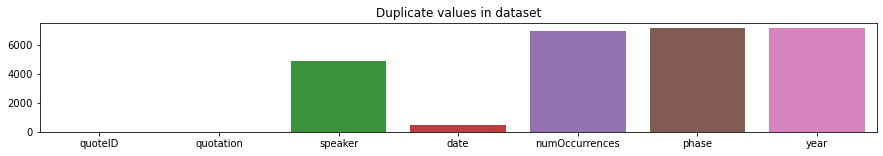

In [13]:
# Duplicate values
print('\033[1m','Duplicate values of ',len(df_step2),' total elements \n')

c=list(df_step2.columns)
c.remove('qids')
c.remove('probas')
c.remove('urls')
v = []

for m in c:
    print('\033[0m','Duplicated ',m,': ',df_step2.duplicated([m]).sum(),'')
    v.append(df_step2.duplicated([m]).sum())
fig, axs = plt.subplots(1, 1,figsize=(15,2))
sns.barplot(c,v)
axs.set_title('Duplicate values in dataset')
plt.show()

In [14]:
# Drop duplicates
print('\033[1m', 'There are no duplicate quotations or quoteIDs\n') 

 There are no duplicate quotations or quoteIDs



 Missing values of  7124  total elements 

 Missing  quoteIDs :  0 
 Missing  quotation :  0 
 Missing  speaker :  2439 
 Missing  qids :  2439 
 Missing  numOcurr :  0 
 Missing  probas :  0 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


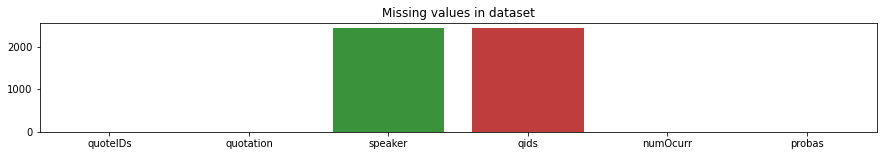

In [15]:
# Missing values for quotebank
print('\033[1m','Missing values of ',len(df_step2),' total elements \n')

mqid = len(df_step2) -len(df_step2[df_step2["quoteID"].notnull()])
mq = len(df_step2) -len(df_step2[df_step2["quotation"].notna()])
ms = len(df_step2[df_step2["speaker"] == 'None'])
mqiss = len(df_step2[(df_step2.qids.apply(lambda x: len(x)==0))])
mno = len(df_step2[df_step2["numOccurrences"] == 0])
mp = len(df_step2[(df_step2.probas.apply(lambda x: len(x)==0))])

missing = ['quoteIDs','quotation','speaker','qids','numOcurr','probas']
vals = [mqid,mq,ms,mqiss,mno,mp]
for i in range(len(vals)):
    print('\033[0m','Missing ',missing[i],': ',vals[i],'')
    
fig, axs = plt.subplots(1, 1,figsize=(15,2))
sns.barplot(missing,vals)
axs.set_title('Missing values in dataset')
plt.show()

In [16]:
# Remove empty quotes
print('\033[1m', 'There are no emtpy rows or missing quotations')

 There are no emtpy rows or missing quotations


 Missing values of  9055981  total elements 

 Missing  aliases :  7852579 
 Missing  date_of_birth :  4038648 
 Missing  nationality :  5340129 
 Missing  gender :  1950381 
 Missing  lastrevid :  0 
 Missing  ethnic_group :  8925596 
 Missing  US_congress_bio_ID :  9043107 
 Missing  occupation :  2682897 
 Missing  party :  8656805 
 Missing  academic_degree :  8955986 
 Missing  id :  0 
 Missing  label :  512300 
 Missing  candidacy :  8990539 
 Missing  religion :  8859697 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


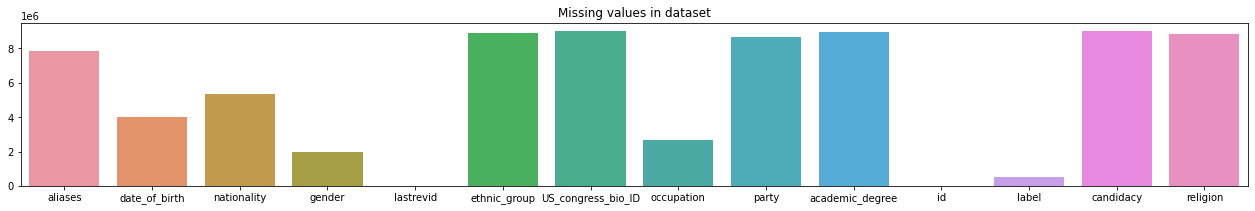

In [17]:
# Missing values for speakers_attributes
print('\033[1m','Missing values of ',len(df_speaker_attributes),' total elements \n')

vals = []
missing = ['aliases','date_of_birth','nationality','gender','lastrevid','ethnic_group','US_congress_bio_ID','occupation','party','academic_degree','id','label','candidacy','religion']
for m in missing:
    vals.append(len(df_speaker_attributes[df_speaker_attributes[m].isnull()]))
for i in range(len(vals)):
    print('\033[0m','Missing ',missing[i],': ',vals[i],'')

fig,axs = plt.subplots(1, 1,figsize=(22,3))
sns.barplot(missing,vals)
axs.set_title('Missing values in dataset')
plt.show()

 Incorrect or inconsistent values: 

 More than 1 qids or probas: Indicates uncertainity in the identity of the speaker


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 1  qids:  3281 ;  1  probas 0 
 2  qids:  613 ;  2  probas 3438 
 3  qids:  201 ;  3  probas 1917 
 4  qids:  118 ;  4  probas 910 
 5  qids:  86 ;  5  probas 380 
 6  qids:  54 ;  6  probas 208 
 7  qids:  64 ;  7  probas 101 


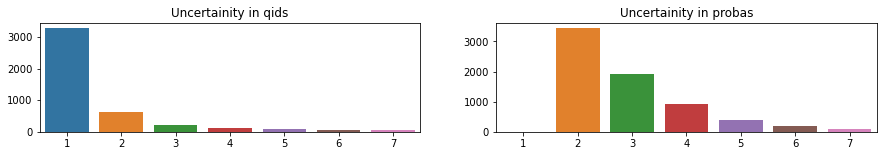

In [18]:
# Incorrect or inconsistent values.
# Find more than one qid or probas for each speaker (indicate uncertainity)
print('\033[1m','Incorrect or inconsistent values: \n')
print('\033[0m','More than 1 qids or probas: Indicates uncertainity in the identity of the speaker')

uncertainity = [1,2,3,4,5,6,7]
qids_uncert=[]
p_uncert = []
for d in uncertainity:
    u = len(df_step2[(df_step2.qids.apply(lambda x: len(x)==d))])
    qids_uncert.append(u)
    p = len(df_step2[(df_step2.probas.apply(lambda x: len(x)==d))])
    p_uncert.append(p)
    print('\033[0m',d,' qids: ',u,'; ',d,' probas',p,'')
fig, axs = plt.subplots(1, 2,figsize=(15,2))
sns.barplot(uncertainity,qids_uncert,ax=axs[0])
axs[0].set_title('Uncertainity in qids')
sns.barplot(uncertainity,p_uncert,ax=axs[1])
axs[1].set_title('Uncertainity in probas')
plt.show()

In [19]:
# Get only the first qid for each speaker
print('\033[1m','We keep only the first qid for each speaker and check that Speaker-Qids are consistent \n')
print('\033[1m', 'Chose only the first qid for each speaker \n') 
df_step2['unique_qids'] = df_step2.qids.apply(lambda y: [] if len(y)==0 else [y[0]]) # Find unique qids
print('\033[0m','It is possible to have different names for the same speaker ex: President Trump, Donald Trump \n')
print('\033[0m','There are: ', df_step2.speaker.nunique(), ' unique speakers \n There are: ',df_step2.unique_qids.nunique(),' unique qids')
print(' Therefore different names correspond to the same qid, as there are the same amount of missing values for both.\n')

xl = ['unique_speakers','unique qids']
yl = [df_step2.speaker.nunique(),df_step2.unique_qids.nunique()]

 We keep only the first qid for each speaker and check that Speaker-Qids are consistent 

 Chose only the first qid for each speaker 

 It is possible to have different names for the same speaker ex: President Trump, Donald Trump 



TypeError: unhashable type: 'list'

In [20]:
# Missing speakers are associated their second value in 'probas' if >X%
print('\033[1m', 'Associate missing speakers with their second value in \'probas\' column if >X% \n') 

i = list(df_step2[df_step2.speaker=='None'].index) # First find the empty speakers
empty = df_step2.iloc[i]
indexes = [x for x in empty.index if float(empty.loc[x,'probas'][1][1])>0.4] # Where prob > X%
subs = [x[1][0] for x in df_step2.loc[indexes,'probas']] # get the second speaker after 'None'
b = zip(indexes,subs)
dn = pd.DataFrame(b)
xn = dn.set_index(0)
df_step2.loc[indexes,'speaker']= xn.loc[indexes,1] # Substitute the empty speaker for the second option
df_step2 = df_step2[df_step2.speaker!='None'] # Drop those that still are not filled

 Associate missing speakers with their second value in 'probas' column if >X% 



In [21]:
# Inconsistent and incorrect values. Some aliases are empty so they are filled with the 'label' value
print('\033[1m','Fill empty aliases with \'label\' value \n')
inull = df_speaker_attributes[df_speaker_attributes.aliases.isnull()].index
df_speaker_attributes.loc[inull,'aliases'] = df_speaker_attributes.loc[inull,'label']
df_speaker_attributes = df_speaker_attributes.dropna(subset=['aliases'])

 Fill empty aliases with 'label' value 



In [22]:
names_wo_id = list(df_step2[df_step2.unique_qids.apply(lambda x: len(x) ==0)]['speaker'])
names_wo_id_df = pd.DataFrame(names_wo_id).drop_duplicates()
names_wo_id = list(names_wo_id_df[0])

In [23]:
# Add qid for the ones that were missing (use speakers_attributes.parquet)
print('\033[1m','Find the qids that correspond to each speaker from the speakers_attributes file \n')
kv = []
for query in names_wo_id:
    idss=list(df_speaker_attributes[df_speaker_attributes.aliases.apply(lambda y: query in y)].id)
    theid = [idss[0]] if len(idss)>0 else None
    kv.append({'name':query,'qid':theid})
auxi = pd.DataFrame(kv)
auxi = auxi.dropna(subset=['qid'])

 Find the qids that correspond to each speaker from the speakers_attributes file 



In [24]:
print('\033[0m','We set the indices of df_step2 and auxiliar df to speakers in order to assign qids')
auxi = auxi.set_index('name')
auxi.head(5)
keepindex = df_step2.index # store the index for later
df_step2 = df_step2.set_index('speaker') # change the index to the 'speakers'

print('\033[0m','Finally we substitute the None qids with valid qids \n')
df_step2.loc[auxi.index,'unique_qids'] = auxi.loc[auxi.index,'qid']
df_step2['speaker'] = df_step2.index # rescue the speakers' column
df_step2 = df_step2.set_index(keepindex) # rescue the previous index

 We set the indices of df_step2 and auxiliar df to speakers in order to assign qids
 Finally we substitute the None qids with valid qids 



In [25]:
# Drop rows without found qid
print('\033[1m','Remove rows without found qid: \n ')
df_step2.unique_qids = df_step2.unique_qids.apply(lambda y: np.nan if len(y)==0 else y)

 Remove rows without found qid: 
 


In [26]:
df_step2=df_step2.dropna(0,subset=['unique_qids'])
df_step2['qids'] = df_step2['unique_qids']
df_step2 = df_step2[["quoteID", "quotation", "speaker", "qids", "date", "numOccurrences", "probas", "urls", "phase", "unique_qids", "year"]]
df_step2 = df_step2.drop('unique_qids', axis=1)
df_step2 = df_step2.dropna(subset=['qids'])


/var/folders/cz/drxl2w614qg049wmqrzy06ww0000gn/T/ipykernel_30475/3429386439.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_step2=df_step2.dropna(0,subset=['unique_qids'])


In [27]:
df_step2

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year
1,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,[Q5375903],2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015
2,2015-04-22-037418,Leaving would be economic madness-all that har...,Gary Lewis,[Q113949],2015-04-22 05:00:56,1,"[[Gary Lewis, 0.5536], [None, 0.3997], [Nigel ...",[http://www.director.co.uk/a1-pharmaceuticals/],E,2015
3,2015-11-05-013470,Brexit could prevent emigration that would oth...,Edgar Morgenroth,[Q57152834],2015-11-05 01:00:34,6,"[[Edgar Morgenroth, 0.9296], [None, 0.0704]]",[http://www.irishtimes.com/business/economy/br...,E,2015
4,2015-02-01-004063,Brexit: How Britain Will Leave Europe.,Denis MacShane,[Q695061],2015-02-01 09:12:29,21,"[[Denis MacShane, 0.849], [None, 0.1059], [The...",[http://news.yahoo.com/greece-shakes-europes-p...,E,2015
8,2015-11-10-067367,leaving the EU is not some artificial fast-tra...,Chris Mason,[Q1077516],2015-11-10 11:25:37,1,"[[Chris Mason, 0.8921], [None, 0.0993], [David...",[http://mashable.com/2015/11/10/britain-brexit...,E,2015
...,...,...,...,...,...,...,...,...,...,...
7115,2020-01-31-011283,Brexit has been a very divisive process. I am ...,David Gauke,[Q391256],2020-01-31 08:30:00,1,"[[David Gauke, 0.8412], [None, 0.1588]]",[http://hillingdontimes.co.uk/news/18199708.pe...,E,2020
7119,2020-01-30-011610,"Brexit, Trump, Boris Johnson, Extinction Rebel...",Alex Paterson,[Q4717608],2020-01-30 00:00:00,1,"[[Alex Paterson, 0.8857], [None, 0.0987], [Sam...",[https://www.forbes.com/sites/mattpaprocki/202...,E,2020
7120,2020-01-14-009665,"Brexit, Orange Man bad. etc",Stewart Lee,[Q7615848],2020-01-14 18:20:08,1,"[[Stewart Lee, 0.7955], [None, 0.1617], [Jerem...",[https://www.breitbart.com/europe/2020/01/14/d...,E,2020
7121,2020-01-08-009999,Brexit does not only mark the end of something...,Ursula von der Leyen,[Q60772],2020-01-08 12:12:12,1,"[[Ursula von der Leyen, 0.7996], [None, 0.1713...",[https://www.bbc.co.uk/news/live/uk-politics-5...,E,2020


In [28]:
df_step2.to_json(path_or_buf='./data/df_step2.json.bz2', orient='records', compression='bz2', lines=True)

The third and final step involves matching each quote with attributes of its speaker. As mentioned above, this is done by looking into Wikidata subset datasource and grabbing attributes assigned to most likely speaker's Wikidata QID. Because some fields may be empty (due to missing data), we make sure that this case is handled correctly.

**Inputs:**
- compressed JSON file with quotes mentioning Brexit and with a known speaker from Quotebank from given year, e.g., `quotes-{year}-step2.json.bz2`

- Wikidata subset with data regarding speakers from Quotebank, stored as a .parquet file, i.e. `speaker_attributes.parquet`

- Wikidata subset with labels and descriptions of all references mentioned in .parquet Wikidata subset, i.e. `wikidata_labels_descriptions_quotebank.csv.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit and with a known speaker from Quotebank from given year, alongside attributes for speaker of each quote, e.g., `quotes-{year}-step3.json.bz2`

**NOTE:** Wikidata `.parquet` file is stored in memory, which could take ~6 GB of your RAM - please consider using Google Colab, which by default provides 12 GB of RAM.

In [29]:
# # Step 3: merge data from Quotebank and Wikidata
# # NOTE: Wikidata parquet requires ~7 GB of RAM available - please use Colab for this step
# wd_df = pd.read_parquet('data/speaker_attributes.parquet')
# wd_df.set_index('id', inplace=True)

# wd_desc_df = pd.read_csv('data/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

# for year in YEARS:
#     path_to_file = f'data/quotes-{year}-step2.json.bz2' 
#     path_to_out = f'data/quotes-{year}-step3.json.bz2'
#     index_of_wd_df = set(wd_df.index)
#     with bz2.open(path_to_file, 'rb') as s_file:
#         with bz2.open(path_to_out, 'wb') as d_file:
#             for instance in s_file:
#                 instance = json.loads(instance) # loading a sample
#                 qid = list(index_of_wd_df.intersection(set(instance['qids'])))
#                 if(len(qid) == 0):
#                     # Overall, two quotes get ignored due to no match in Wikidata
#                     d_file.write((json.dumps(instance)+'\n').encode('utf-8')) 
#                     continue
#                 if (wd_df['gender'][qid][0] is not None):
#                   instance['gender'] = wd_desc_df['Label'][wd_df['gender'][qid][0]].tolist()
#                 else:
#                   instance['gender'] = []
#                 if (wd_df['date_of_birth'][qid][0] is not None):
#                   instance['date_of_birth'] = wd_df['date_of_birth'][qid][0].tolist()
#                 else:
#                   instance['date_of_birth'] = []
#                 if (wd_df['nationality'][qid][0] is not None):
#                   instance['nationality'] = wd_desc_df['Label'][wd_df['nationality'][qid][0]].tolist()
#                 else:
#                   instance['nationality'] = []
#                 if (wd_df['occupation'][qid][0] is not None):
#                   instance['occupation'] = wd_desc_df['Label'][wd_df['occupation'][qid][0]].tolist()
#                 else:
#                   instance['occupation'] = []
#                 if (wd_df['party'][qid][0] is not None):
#                   instance['party'] = wd_desc_df['Label'][wd_df['party'][qid][0]].tolist()
#                 else:
#                   instance['party'] = []
#                 if (wd_df['academic_degree'][qid][0] is not None):
#                   instance['academic_degree'] = wd_desc_df['Label'][wd_df['academic_degree'][qid][0]].tolist()
#                 else:
#                   instance['academic_degree'] = []
#                 if (wd_df['candidacy'][qid][0] is not None):
#                   instance['candidacy'] = wd_desc_df['Label'][wd_df['candidacy'][qid][0]].tolist()
#                 else:
#                   instance['candidacy'] = []
#                 if (wd_df['religion'][qid][0] is not None):
#                   instance['religion'] = wd_desc_df['Label'][wd_df['religion'][qid][0]].tolist()
#                 else:
#                   instance['religion'] = []
#                 d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

In [30]:

df_step3 = pd.read_json('./data/df_step3.json.bz2', compression='bz2', lines=True)
df_step3


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,gender,date_of_birth,nationality,occupation,party,academic_degree,candidacy,religion
0,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,[Q5375903],2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015,[male],[],[Australia],[songwriter],[],[],[],[]
1,2015-04-22-037418,Leaving would be economic madness-all that har...,Gary Lewis,[Q113949],2015-04-22 05:00:56,1,"[[Gary Lewis, 0.5536], [None, 0.3997], [Nigel ...",[http://www.director.co.uk/a1-pharmaceuticals/],E,2015,[male],[+1958-11-30T00:00:00Z],[United Kingdom],"[film actor, performing artist, stage actor, t...",[],[],[],[]
2,2015-11-05-013470,Brexit could prevent emigration that would oth...,Edgar Morgenroth,[Q57152834],2015-11-05 01:00:34,6,"[[Edgar Morgenroth, 0.9296], [None, 0.0704]]",[http://www.irishtimes.com/business/economy/br...,E,2015,[male],[],[],[researcher],[],[],[],[]
3,2015-02-01-004063,Brexit: How Britain Will Leave Europe.,Denis MacShane,[Q695061],2015-02-01 09:12:29,21,"[[Denis MacShane, 0.849], [None, 0.1059], [The...",[http://news.yahoo.com/greece-shakes-europes-p...,E,2015,[male],[+1948-05-21T00:00:00Z],[United Kingdom],"[politician, trade unionist]",[Labour Party],[],"[2010 United Kingdom general election, 2005 Un...",[]
4,2015-11-10-067367,leaving the EU is not some artificial fast-tra...,Chris Mason,[Q1077516],2015-11-10 11:25:37,1,"[[Chris Mason, 0.8921], [None, 0.0993], [David...",[http://mashable.com/2015/11/10/britain-brexit...,E,2015,[male],[+1969-12-17T00:00:00Z],[United Kingdom],[darts player],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,2020-01-31-011283,Brexit has been a very divisive process. I am ...,David Gauke,[Q391256],2020-01-31 08:30:00,1,"[[David Gauke, 0.8412], [None, 0.1588]]",[http://hillingdontimes.co.uk/news/18199708.pe...,E,2020,[male],[+1971-10-08T00:00:00Z],[United Kingdom],[politician],[Conservative Party],[],"[2019 United Kingdom general election, 2010 Un...",[]
4870,2020-01-30-011610,"Brexit, Trump, Boris Johnson, Extinction Rebel...",Alex Paterson,[Q4717608],2020-01-30 00:00:00,1,"[[Alex Paterson, 0.8857], [None, 0.0987], [Sam...",[https://www.forbes.com/sites/mattpaprocki/202...,E,2020,[male],[+1959-10-15T00:00:00Z],[United Kingdom],[disc jockey],[],[],[],[]
4871,2020-01-14-009665,"Brexit, Orange Man bad. etc",Stewart Lee,[Q7615848],2020-01-14 18:20:08,1,"[[Stewart Lee, 0.7955], [None, 0.1617], [Jerem...",[https://www.breitbart.com/europe/2020/01/14/d...,E,2020,[male],[+1968-04-05T00:00:00Z],[United Kingdom],"[writer, comedian, actor, stand-up comedian, s...",[],[],[],[atheism]
4872,2020-01-08-009999,Brexit does not only mark the end of something...,Ursula von der Leyen,[Q60772],2020-01-08 12:12:12,1,"[[Ursula von der Leyen, 0.7996], [None, 0.1713...",[https://www.bbc.co.uk/news/live/uk-politics-5...,E,2020,[female],[+1958-10-08T00:00:00Z],[Germany],"[physician, politician, equestrian]",[Christian Democratic Union],"[Doctor of Medicine, public health professiona...","[2013 German federal election, 2017 German fed...",[Lutheranism]


# Justify feasibility given the data
- Format is appropriate for analysis
- Enough quotes
- Quotes addressing the issue
- Different speakers involved
- Uniformity of speakers (not all from the same speaker)
- Long and short sentences
- Not many missing quotes
- Not many missing speakers
- There shouldnt be many correlations between (i dont know)

## 3.3. Clean up data

# Generic cleaning
- Identify duplicates
- Remove empty quotes
- Remove empty speakers

#### PARQUET FILE


In [31]:
# Formats, shapes and data types
print('\033[1m','Formats, shapes and data types: \n')
print('\033[0m')
df_speaker_attributes.info()

 Formats, shapes and data types: 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8544170 entries, 0 to 9055980
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   aliases             object
 1   date_of_birth       object
 2   nationality         object
 3   gender              object
 4   lastrevid           int64 
 5   ethnic_group        object
 6   US_congress_bio_ID  object
 7   occupation          object
 8   party               object
 9   academic_degree     object
 10  id                  object
 11  label               object
 12  candidacy           object
 13  type                object
 14  religion            object
dtypes: int64(1), object(14)
memory usage: 1.0+ GB


In [32]:
# Reading samples of quotes
print('\033[1m','Reading a sample of speakers_attributes: \n')
df_speaker_attributes.head(2)

 Reading a sample of speakers_attributes: 



,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None


In [33]:
# Duplicate values
print('\033[0m','Duplicated ids: ',df_speaker_attributes.duplicated(['id']).sum(),'')
print('\033[0m','Duplicated label: ',df_speaker_attributes.duplicated(['label']).sum(),'') #could be 'none'

 Duplicated ids:  0 
 Duplicated label:  1256871 


 Missing values of  8544170  total elements 

 Missing  aliases :  0 
 Missing  date_of_birth :  3877231 
 Missing  nationality :  5015154 
 Missing  gender :  1831888 
 Missing  lastrevid :  0 
 Missing  ethnic_group :  8425362 
 Missing  US_congress_bio_ID :  8531296 
 Missing  occupation :  2470043 
 Missing  party :  8183245 
 Missing  academic_degree :  8471896 
 Missing  id :  0 
 Missing  label :  489 
 Missing  candidacy :  8479585 
 Missing  religion :  8361006 


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


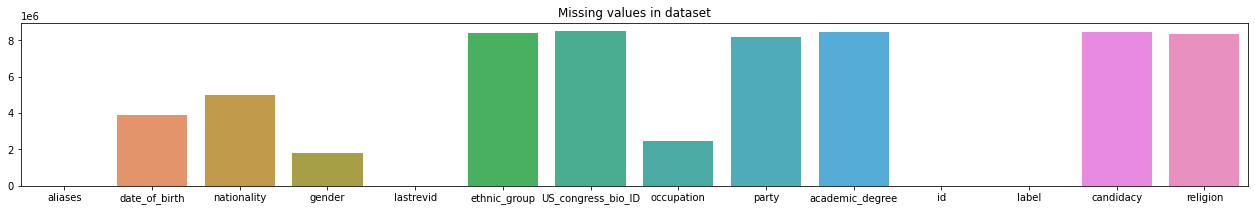

In [34]:
# Missing values
print('\033[1m','Missing values of ',len(df_speaker_attributes),' total elements \n')

vals = []
missing = ['aliases','date_of_birth','nationality','gender','lastrevid','ethnic_group','US_congress_bio_ID','occupation','party','academic_degree','id','label','candidacy','religion']
for m in missing:
    vals.append(len(df_speaker_attributes[df_speaker_attributes[m].isnull()]))
for i in range(len(vals)):
    print('\033[0m','Missing ',missing[i],': ',vals[i],'')

fig,axs = plt.subplots(1, 1,figsize=(22,3))
sns.barplot(missing,vals)
axs.set_title('Missing values in dataset')
plt.show()

In [35]:
# Inconsistent and incorrect values. Some aliases are empty so they are filled with the 'label' value
print('\033[1m','Fill empty aliases with \'label\' value \n')

inull = df_speaker_attributes[df_speaker_attributes.aliases.isnull()].index
df_speaker_attributes.loc[inull,'aliases'] = df_speaker_attributes.loc[inull,'label']
df_speaker_attributes = df_speaker_attributes.dropna(subset=['aliases'])
df_speaker_attributes.tail(3)


 Fill empty aliases with 'label' value 



,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
9055978,Dina David,[+1848-04-01T00:00:00Z],None,[Q6581072],1397399751,None,None,None,None,None,Q106406588,Dina David,None,item,None
9055979,Irma Dexinger,[+1899-03-18T00:00:00Z],None,[Q6581072],1397399799,None,None,None,None,None,Q106406593,Irma Dexinger,None,item,None
9055980,[Fred Trull],None,[Q30],[Q6581097],1397400809,None,None,[Q82955],None,None,Q106406643,Fred F. Trull,None,item,None


 Investigate summary distributions


/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/victorgonzalez/opt/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

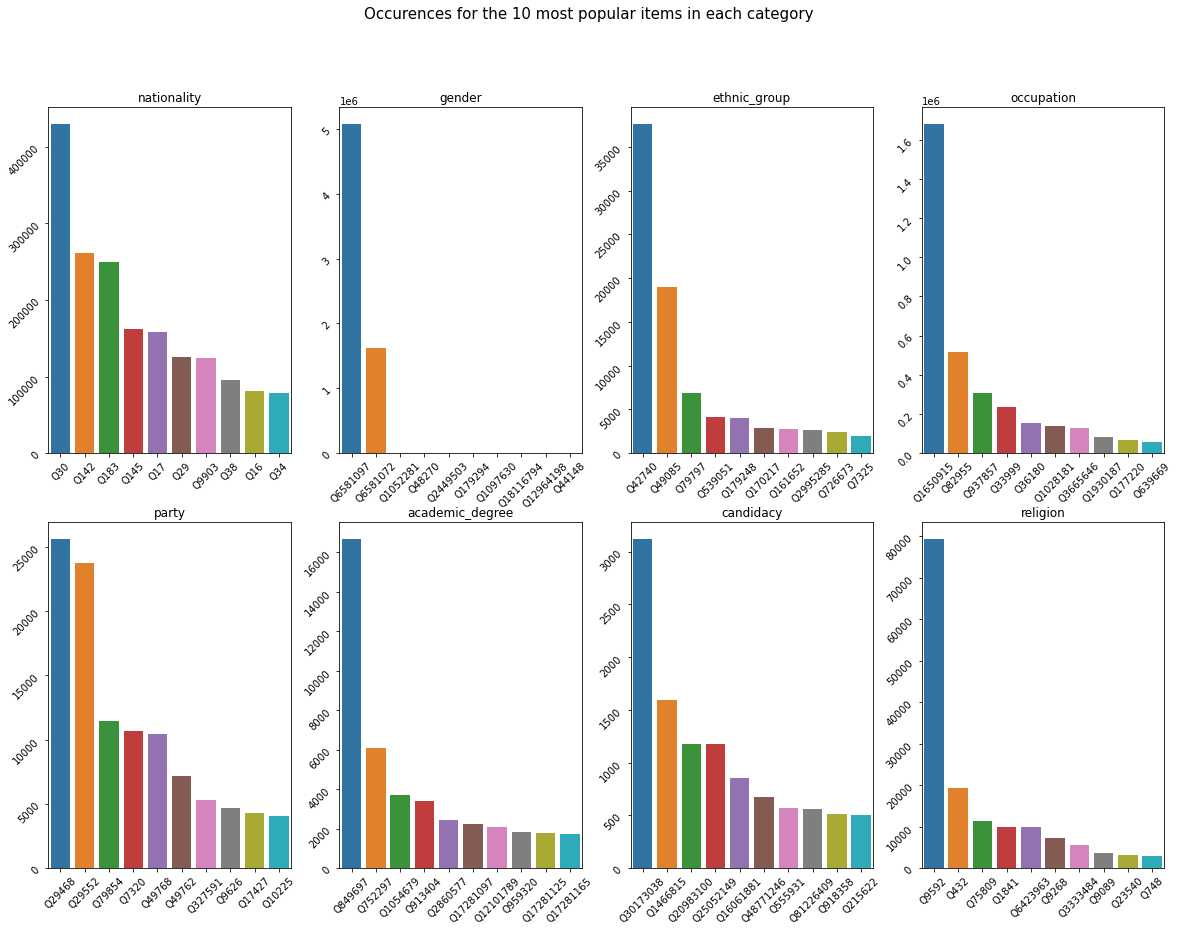

In [36]:
# Extracting summary statistics & distributions 
from collections import Counter
print('\033[1m','Investigate summary distributions')

labs = ['nationality','gender','ethnic_group','occupation','party','academic_degree','candidacy','religion']
fig, axs = plt.subplots(2, 4,figsize=(20,14))

n = 0
for ele in labs:
    f = int(np.floor(n/4))
    c = n%4
    a =[x[0] for x in list(df_speaker_attributes.dropna(subset=[ele])[ele])]
    r = Counter(a)
    b = r.most_common()[0:10]
    k = [i[0] for i in b]
    v = [i[1] for i in b]
    sns.barplot(k,v,ax = axs[f][c])
    axs[f][c].set_title(labs[n])
    axs[f][c].tick_params(labelrotation=45)

    n+=1
plt.suptitle('Occurences for the 10 most popular items in each category',fontsize=15)
plt.show()

# NLP cleaning
- Remove capital letters, punctuations, emojis, links
- Remove quotes not mentioning Breixit

The first step removes quotes that are not mentioning Brexit and as such are irrelevant to our analysis. We do this by using a regular expression that matches quotes that either contain the phrase "Brexit" or the combination of "leave", "leaving", "exit", "exiting" and "EU" or "European Union". We use a streaming approach used [here](https://colab.research.google.com/drive/1NqLFrAWAzKxr2dAWHI7m6Ml3gWGF72cA) in order to reduce the strain on RAM usage (each datasource file is approx. 2 GB in size).

**Input:** Compressed JSON file with quotes from Quotebank from given year, e.g., `quotes-{year}.json.bz2`

**Output:** Compressed JSON file with quotes mentioning Brexit from Quotebank from given year, e.g., `quotes-{year}-step1.json.bz2`

**NOTE**: due to large number of quotes, this step can take long time - possibly over an hour. You have been warned.

In [37]:
df_quotes = df_step3
df_quotes

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,year,gender,date_of_birth,nationality,occupation,party,academic_degree,candidacy,religion
0,2015-11-14-006404,"Brexit isn't in Ireland's economic interest,",Enda Kenny,[Q5375903],2015-11-14 02:32:37,1,"[[Enda Kenny, 0.9055], [None, 0.0945]]",[http://www.independent.ie/opinion/comment/no-...,E,2015,[male],[],[Australia],[songwriter],[],[],[],[]
1,2015-04-22-037418,Leaving would be economic madness-all that har...,Gary Lewis,[Q113949],2015-04-22 05:00:56,1,"[[Gary Lewis, 0.5536], [None, 0.3997], [Nigel ...",[http://www.director.co.uk/a1-pharmaceuticals/],E,2015,[male],[+1958-11-30T00:00:00Z],[United Kingdom],"[film actor, performing artist, stage actor, t...",[],[],[],[]
2,2015-11-05-013470,Brexit could prevent emigration that would oth...,Edgar Morgenroth,[Q57152834],2015-11-05 01:00:34,6,"[[Edgar Morgenroth, 0.9296], [None, 0.0704]]",[http://www.irishtimes.com/business/economy/br...,E,2015,[male],[],[],[researcher],[],[],[],[]
3,2015-02-01-004063,Brexit: How Britain Will Leave Europe.,Denis MacShane,[Q695061],2015-02-01 09:12:29,21,"[[Denis MacShane, 0.849], [None, 0.1059], [The...",[http://news.yahoo.com/greece-shakes-europes-p...,E,2015,[male],[+1948-05-21T00:00:00Z],[United Kingdom],"[politician, trade unionist]",[Labour Party],[],"[2010 United Kingdom general election, 2005 Un...",[]
4,2015-11-10-067367,leaving the EU is not some artificial fast-tra...,Chris Mason,[Q1077516],2015-11-10 11:25:37,1,"[[Chris Mason, 0.8921], [None, 0.0993], [David...",[http://mashable.com/2015/11/10/britain-brexit...,E,2015,[male],[+1969-12-17T00:00:00Z],[United Kingdom],[darts player],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,2020-01-31-011283,Brexit has been a very divisive process. I am ...,David Gauke,[Q391256],2020-01-31 08:30:00,1,"[[David Gauke, 0.8412], [None, 0.1588]]",[http://hillingdontimes.co.uk/news/18199708.pe...,E,2020,[male],[+1971-10-08T00:00:00Z],[United Kingdom],[politician],[Conservative Party],[],"[2019 United Kingdom general election, 2010 Un...",[]
4870,2020-01-30-011610,"Brexit, Trump, Boris Johnson, Extinction Rebel...",Alex Paterson,[Q4717608],2020-01-30 00:00:00,1,"[[Alex Paterson, 0.8857], [None, 0.0987], [Sam...",[https://www.forbes.com/sites/mattpaprocki/202...,E,2020,[male],[+1959-10-15T00:00:00Z],[United Kingdom],[disc jockey],[],[],[],[]
4871,2020-01-14-009665,"Brexit, Orange Man bad. etc",Stewart Lee,[Q7615848],2020-01-14 18:20:08,1,"[[Stewart Lee, 0.7955], [None, 0.1617], [Jerem...",[https://www.breitbart.com/europe/2020/01/14/d...,E,2020,[male],[+1968-04-05T00:00:00Z],[United Kingdom],"[writer, comedian, actor, stand-up comedian, s...",[],[],[],[atheism]
4872,2020-01-08-009999,Brexit does not only mark the end of something...,Ursula von der Leyen,[Q60772],2020-01-08 12:12:12,1,"[[Ursula von der Leyen, 0.7996], [None, 0.1713...",[https://www.bbc.co.uk/news/live/uk-politics-5...,E,2020,[female],[+1958-10-08T00:00:00Z],[Germany],"[physician, politician, equestrian]",[Christian Democratic Union],"[Doctor of Medicine, public health professiona...","[2013 German federal election, 2017 German fed...",[Lutheranism]


In [38]:
# Remove capital letters, punctuations, emojis, links

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

df_quotes['quotation'] = df_quotes['quotation'].apply(lambda x: clean_text(x))

In [39]:
# Lemmatization
# The process of grouping together the inflected forms of a word so they can be analyzed as a single item, 
# since they have a similar meaning (walking becomes walk, officers becomes officer, etc.)

lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
df_quotes['quotation'] = df_quotes['quotation'].apply(lambda x: lem(x))
df_quotes=df_quotes.reset_index(drop=True)

## 3.4. Exploring and visualization

### Plan for analysis

# For each of the questions include the following (even though it is not enriched in the end for ex):
- Various choices of analyses that we thought about but discarded 
- Consider ways to enrich, filter, transform data according to needs 
- Final good choice for analysis. Has to be reasonable and sound
- Complete necessary descriptive statistic tasks

# State and describe all of our questions
- Q1: Which percentage of the speakers supported or was against Brexit?
- Q2: What arguments did the members of each category use to support their beliefs? 
- Q3: Who were the main supporters of each of the categories? Analyze them according to age, gender, occupation, ...
- Q4: How did the opinion towards Brexit change during the 5 year span? Did the arguments of each group also change?

#### Q1: Which percentage of the speakers supported or was against Brexit?

The vast majority of comments are what could be considered as rather neutral, with the mean comment having a polarity of 0.051938. About 75% of the comments have a polarity of less than 0.1, meaning there are very few polarized quotes comments 
In fact, only 16 of the 339 quotes have a polarity of more than 0.5.

In [46]:
df_quotes['quotation']

0             [brexit, isnt, ireland, economic, interest]
1       [leave, would, economic, madnessall, hard, wor...
2       [brexit, could, prevent, emigration, would, ot...
3                        [brexit, britain, leave, europe]
4       [leave, eu, artificial, fasttrack, land, milk,...
                              ...                        
4869    [brexit, divisive, process, fill, huge, enthus...
4870    [brexit, trump, boris, johnson, extinction, re...
4871                      [brexit, orange, man, bad, etc]
4872    [brexit, mark, end, something, also, mark, sta...
4873                   [brexit, play, part, doubt, alone]
Name: quotation, Length: 4874, dtype: object

<AxesSubplot:title={'center':'Comments Polarity'}, ylabel='Frequency'>

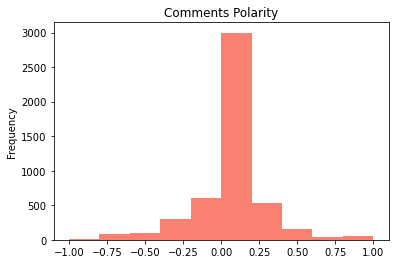

In [47]:
#Get sentiment from comments
df_quotes['quotation_sentiment'] = [str(thing) for thing in df_quotes['quotation']]
sentiment = []
for i in range(len(df_quotes)):
    blob = TextBlob(df_quotes['quotation_sentiment'].iloc[i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
        
df_quotes['sentiment']=sentiment
#Plot
df_quotes['sentiment'].plot.hist(color='salmon', title='Comments Polarity')

In [48]:
df_quotes['quotation']

0             [brexit, isnt, ireland, economic, interest]
1       [leave, would, economic, madnessall, hard, wor...
2       [brexit, could, prevent, emigration, would, ot...
3                        [brexit, britain, leave, europe]
4       [leave, eu, artificial, fasttrack, land, milk,...
                              ...                        
4869    [brexit, divisive, process, fill, huge, enthus...
4870    [brexit, trump, boris, johnson, extinction, re...
4871                      [brexit, orange, man, bad, etc]
4872    [brexit, mark, end, something, also, mark, sta...
4873                   [brexit, play, part, doubt, alone]
Name: quotation, Length: 4874, dtype: object

In [49]:
df_quotes['sentiment'].describe()

count    4874.000000
mean        0.040556
std         0.234116
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.133333
max         1.000000
Name: sentiment, dtype: float64

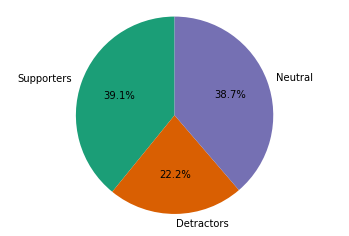

In [50]:
supporters = df_quotes.loc[df_quotes['sentiment'] > 0]
supporters_percentage = len(supporters.index)/len(df_quotes.index)
detractors = df_quotes.loc[df_quotes['sentiment'] < 0]
detractors_percentage = len(detractors.index)/len(df_quotes.index)
neutral = df_quotes.loc[df_quotes['sentiment'] == 0]
neutral_percentage = len(neutral.index)/len(df_quotes.index)
# print("Percentage of supporters: {0:.2%}".format(supporters_percentage))
# print("Percentage of detractors: {0:.2%}".format(detractors_percentage))
# print("Percentage of neutral: {0:.2%}".format(neutral_percentage))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Supporters', 'Detractors', 'Neutral'
colors = ['#1b9e77', '#d95f02', '#7570b3']
sizes = [supporters_percentage, detractors_percentage, neutral_percentage]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Q2: What arguments did the members of each category use to support their beliefs? 


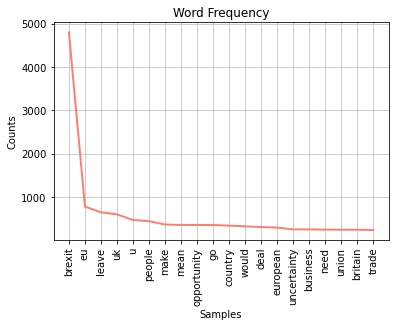

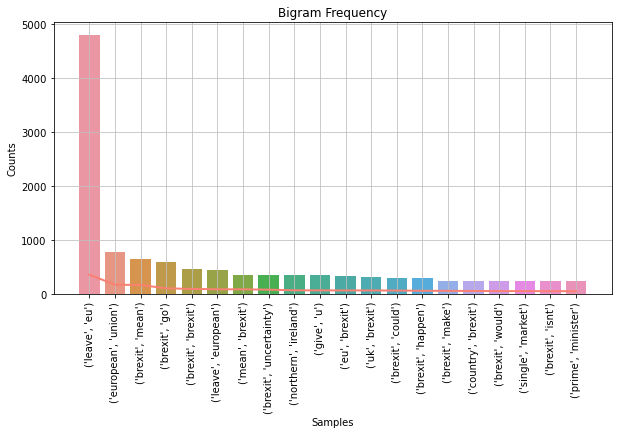

AttributeError: 'list' object has no attribute 'items'

In [51]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(df_quotes)):
    all_words = all_words + df_quotes['quotation'].iloc[i]
#Get word frequency        
words_1 = nltk.FreqDist(all_words)
plot1 = words_1.plot(20, color='salmon', title='Word Frequency')

## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(all_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

## Generate bigrams
ngrams = nltk.bigrams(all_words)

## Creating FreqDist
ngram_fd = nltk.FreqDist(ngrams).most_common(20)
## Sort values by highest frequency
ngram_sorted = {k:v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=reverse_sort)}

## Join bigram tokens with '_' + maintain sorting
ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=reverse_sort)}

## Convert to Pandas series for easy plotting
ngram_freqdist = pd.Series(ngram_joined)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10,10))

## Setting plot to horizontal for easy viewing + setting title + display  
bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax)
plt.title('Frequency Distribution')
plt.show();

#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(20, color='salmon', title='Trigram Frequency')

In [52]:
#From lists of detractors quotes to a single list containing all detractors words      
detractors_words=[]        
for i in range(len(detractors)):
    detractors_words = detractors_words + detractors['quotation'].iloc[i]

In [53]:
#Get word frequency        
words_1 = nltk.FreqDist(detractors_words)

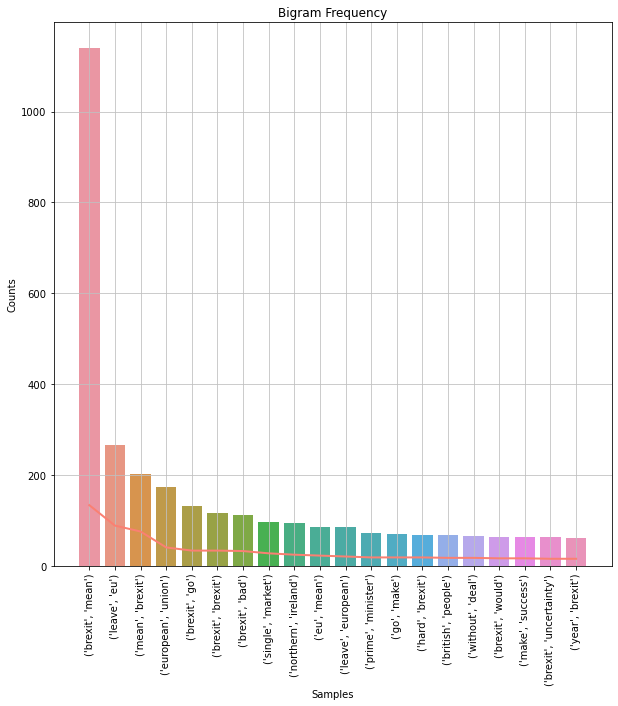

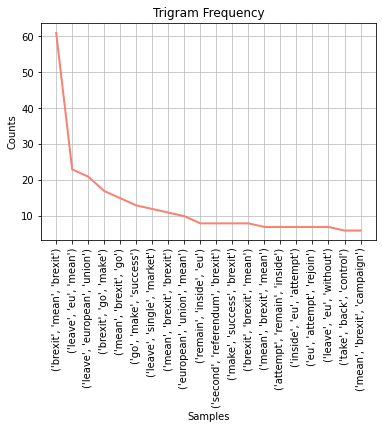

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [54]:
all_fdist = words_1.most_common(20)
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);
# plot1 = words_1.plot(20, color='salmon', title='Word Frequency')


#Bigrams
bigrm = list(nltk.bigrams(detractors_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')
#Trigrams
trigrm = list(nltk.trigrams(detractors_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(20, color='salmon', title='Trigram Frequency')

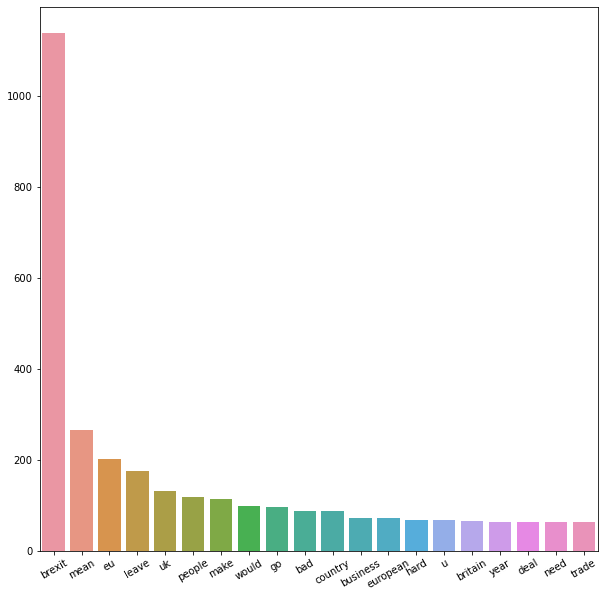

In [55]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = words_1.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

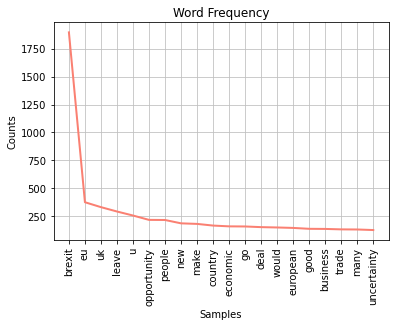

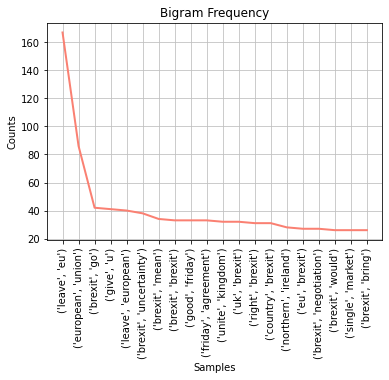

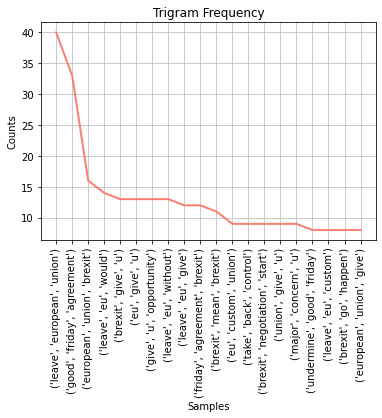

<AxesSubplot:title={'center':'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [56]:
#From lists of supporters quotes to a single list containing all supporters words      
supporters_words=[]        
for i in range(len(supporters)):
    supporters_words = supporters_words + supporters['quotation'].iloc[i]

#Get word frequency        
nlp_words = nltk.FreqDist(supporters_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')
#Bigrams
bigrm = list(nltk.bigrams(supporters_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')
#Trigrams
trigrm = list(nltk.trigrams(supporters_words))
words_3 = nltk.FreqDist(trigrm)
words_3.plot(20, color='salmon', title='Trigram Frequency')

In [57]:
trigrm

[('brexit', 'isnt', 'ireland'),
 ('isnt', 'ireland', 'economic'),
 ('ireland', 'economic', 'interest'),
 ('economic', 'interest', 'leave'),
 ('interest', 'leave', 'would'),
 ('leave', 'would', 'economic'),
 ('would', 'economic', 'madnessall'),
 ('economic', 'madnessall', 'hard'),
 ('madnessall', 'hard', 'work'),
 ('hard', 'work', 'drain'),
 ('work', 'drain', 'every'),
 ('drain', 'every', 'time'),
 ('every', 'time', 'another'),
 ('time', 'another', 'country'),
 ('another', 'country', 'join'),
 ('country', 'join', 'eu'),
 ('join', 'eu', 'recruit'),
 ('eu', 'recruit', 'new'),
 ('recruit', 'new', 'member'),
 ('new', 'member', 'staff'),
 ('member', 'staff', 'country'),
 ('staff', 'country', 'best'),
 ('country', 'best', 'thing'),
 ('best', 'thing', 'happen'),
 ('thing', 'happen', 'pharmaceutical'),
 ('happen', 'pharmaceutical', 'last'),
 ('pharmaceutical', 'last', 'decade'),
 ('last', 'decade', 'addition'),
 ('decade', 'addition', 'eastern'),
 ('addition', 'eastern', 'european'),
 ('eastern

#### Q3: Who were the main supporters of each of the categories? Analyze them according to age, gender, occupation, ...


In [58]:
strong_supporters_name = supporters['speaker'].loc[supporters['sentiment']>0.5].drop_duplicates()
strong_supporters_name

5           Victor Ponta
25         Emma Reynolds
133     Christian Felber
169     Timothy Kirkhope
215         David Zaslav
              ...       
4399       David Trimble
4473       Robert Halfon
4558      Denis MacShane
4574      Sheryll Murray
4615        Jan Zahradil
Name: speaker, Length: 111, dtype: object

In [59]:
strong_detractors_name = detractors['speaker'].loc[detractors['sentiment']<-0.5].drop_duplicates()
strong_detractors_name

4                 Chris Mason
11            Thomas Lundberg
132                Chris Bell
337             Charles Grant
472     Jaap de Hoop Scheffer
                ...          
4484             Michael Kent
4495        Michael Heseltine
4600              Glyn Davies
4797                 Sir John
4871              Stewart Lee
Name: speaker, Length: 81, dtype: object

#### Q4: How did the opinion towards Brexit change during the 5 year span? Did the arguments of each group also change?

## 3.5. Modeling


## 3.6. Interpreting our data

## 3.7. Storytelling and communication

### Plan for storytelling and communication

In [60]:
# Various choices of communication that we thought about but discarded


In [61]:
# Final good choice for communication. Has to be reasonable and sound.


---

# 4. Conclusions

### 4.1. Summary of the notebook


### 4.2. Results obtained


### 4.3. Problems encountered

---

# 5. Future lines